<a href="https://colab.research.google.com/github/tasnimislam/TeamMeena/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset collection
The dataset used is collected from physionet naemly "The Term-Preterm EHG Database (TPEHG DB)" version 1.0.1
https://archive.physionet.org/physiobank/database/tpehgdb/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# import and installation

In [ ]:
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
from scipy.ndimage import filters

!pip install wfdb==0.1.2
import wfdb
from wfdb import rdsamp
import os
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
import random

! pip install emd
! pip install EMD-signal
! pip install flvlib
import emd
import pywt
import warnings
warnings.filterwarnings("ignore")

from PyEMD import EMD
from PyEMD import EEMD


from __future__ import division

     |████████████████████████████████| 163kB 12.0MB/s 
  Created wheel for wfdb: filename=wfdb-0.1.2-cp36-none-any.whl size=23148 sha256=dc96b37f05536278ac7a345588082f973414d57e0c0ee196564161fd8dab85df
  Stored in directory: /root/.cache/pip/wheels/b9/2e/12/e215b6517234c8fc17638fba70081e319ec8f0c21e67c1619b
Successfully built wfdb
     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 2.8MB 7.8MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 81kB 6.6MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
  Created wheel for flvlib: filename=flvlib-0.1.13-cp36-none-any.whl size=33854 sha256=5e7bf0679734f94e5170c14fdda81d2532b306cfc0c403dda1fd822190b66bba
  Stored in directory: /root/.cache/pip/wheels/ae/cd/ea/d9f0379ff95beee82a3c68b304028ce74026ec253227f19f68
Successfully built flvlib


# Exploratory Data Analysis

## Enlist the files in the folders

In [ ]:
from glob import glob
dat_file = glob("/content/drive/MyDrive/mmg_dataset_v2/term-preterm-ehg-database-1.0.1.zip (Unzipped Files)/term-preterm-ehg-database-1.0.1/tpehgdb/*.dat")
hea_file = glob("/content/drive/MyDrive/mmg_dataset_v2/term-preterm-ehg-database-1.0.1.zip (Unzipped Files)/term-preterm-ehg-database-1.0.1/tpehgdb/*.hea")
print(len(dat_file))
print(len(hea_file))

300
300


## Explore one file

In [ ]:
print(hea_file[0])
sig, fields = rdsamp(hea_file[0][:-4], sampfrom=0, sampto=[], channels=[], physical=1, stacksegments=1, pbdl=0, keepfiles=0)

/content/drive/MyDrive/mmg_dataset_v2/term-preterm-ehg-database-1.0.1.zip (Unzipped Files)/term-preterm-ehg-database-1.0.1/tpehgdb/tpehg1151.hea


In [ ]:
#sig[:,2]

No handles with labels found to put in legend.


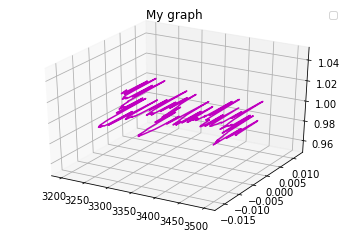

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

ax = plt.subplot(projection='3d')
color = [""] #thik korte hobe
for i in range(1):
  ax.plot(np.linspace(3200, 3500, 300), sig[3200:3500, i],  1, color='m')
# Enable legend
ax.legend()
ax.set_title("My graph")
plt.show()

## Signal Channel range selected
Each record is composed of three channels, recorded from 4 electrodes:

the first electrode (E1) was placed 3.5 cm to the left and 3.5 cm above the navel;
the second electrode (E2) was placed 3.5 cm to the right and 3.5 cm above the navel;
the third electrode (E3) was placed 3.5 cm to the right and 3.5 cm below the navel;
the fourth electrode (E4) was placed 3.5 cm to the left and 3.5 cm below the navel.
The differences in the electrical potentials of the electrodes were recorded, producing 3 channels:

S1 = E2–E1 (first channel);
S2 = E2–E3 (second channel);
S3 = E4–E3 (third channel).
The individual records are 30 minutes in duration. Each signal has been digitized at 20 samples per second per channel with 16-bit resolution over a range of ±2.5 millivolts.

Each signal was digitally filtered using 3 different 4-pole digital Butterworth filters with a double-pass filtering scheme. The band-pass cut-off frequencies were:

from 0.08Hz to 4Hz;
from 0.3Hz to 3Hz;
from 0.3Hz to 4Hz.

In [ ]:
list_of_sig = [sig[:,2], sig[:, 6], sig[:, 10]]

In [ ]:
nsamp = 35360
duration_reorded = nsamp/(20*60)
duration_reorded #(30 sec er signal nise eta dhorlam)

29.466666666666665

The individual records are 30 minutes in duration. Each signal has been digitized at 20 samples per second per channel with 16-bit resolution over a range of ±2.5 millivolts. 

When using filtered channels, note that the first and last 180 seconds of the signals should be ignored since these intervals contain transient effects of the filters.

In [ ]:
tin_sec_er_data = int(nsamp*3//duration_reorded) #transient er jonno bad)
print(tin_sec_er_data)
sig_thik = sig[tin_sec_er_data:(nsamp-tin_sec_er_data), 2]
print(len(sig_thik))

3600
28160


In [ ]:
#create torch for a single channel
numpy_sig = np.array(sig[:, 2])
print(numpy_sig.shape)
#plt.plot(numpy_sig)
sig_torch = torch.from_numpy(numpy_sig)
print(sig_torch.size())
print(sig_torch)
#1d array hobe bolse so thik i ase

(35360,)
torch.Size([35360])
tensor([0.0010, 0.0067, 0.0202,  ..., 0.0000, 0.0002, 0.0002],
       dtype=torch.float64)


In [ ]:
numpy_list_3 = np.array(list_of_sig)
sig_torch_listi = torch.from_numpy(numpy_list_3)
print(sig_torch_listi.size())

torch.Size([3, 35360])


## Create csv file

In [ ]:
print(fields)
for values in fields.keys():
  print(values, ":", fields[values])

{'nseg': 1, 'nsig': 12, 'fs': 20.0, 'nsamp': 35360, 'basetime': '', 'basedate': '', 'filename': ['tpehg1151.dat', 'tpehg1151.dat', 'tpehg1151.dat', 'tpehg1151.dat', 'tpehg1151.dat', 'tpehg1151.dat', 'tpehg1151.dat', 'tpehg1151.dat', 'tpehg1151.dat', 'tpehg1151.dat', 'tpehg1151.dat', 'tpehg1151.dat'], 'fmt': ['16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16'], 'sampsperframe': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'skew': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'byteoffset': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'gain': [13107.0, 13107.0, 13107.0, 13107.0, 13107.0, 13107.0, 13107.0, 13107.0, 13107.0, 13107.0, 13107.0, 13107.0], 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'baseline': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'initvalue': [1672, 40, 13, 34, 749, 19, 5, 13, -204, -6, -2, -6], 'signame': ['1', '1_DOCFILT-4-0.08-4', '1_DOCFILT-4-0.3-3', '1_DOCFILT-4-0.3-4', '2', '2_DOCFILT-4-0.08-4', '2_DOCFILT-4-0.3-3', '2_DOCFILT-4-0.3-

In [ ]:
import pandas as pd
df = pd.DataFrame()
#[' Cervical Dilation: 3/50/-2', ' Days to deliver after recording: 1', ' Race: W', ' BMI: 39.24', ' Gestation: 40+3']

In [ ]:
for i, file_name in enumerate(hea_file):
  if file_name == "/content/drive/MyDrive/mmg dataset/mmg-database-1.0.0/sensorpositions.hea" or file_name == "/content/drive/MyDrive/mmg dataset/mmg-database-1.0.0/218_38w0d.hea": continue
  sig, fields = rdsamp(file_name[:-4], sampfrom=0, sampto=[], channels=[], physical=1, stacksegments=1, pbdl=0, keepfiles=0)
  df.at[i, "nseg"] = fields["nseg"]
  comments = fields["comments"]
  for comment_idx, values in enumerate(comments):
    if comment_idx==0: continue
    keys_val = values.split(" ")
    df.at[i, keys_val[-2]] = keys_val[-1]
df.head()

,nseg,RecID,Gestation,Rectime,Age,Parity,Abortions,Weight,Hypertension,Diabetes,Placental_position,Bleeding_first_trimester,Bleeding_second_trimester,Funneling,Smoker
0,1.0,1151,40.3,22.3,None,None,None,65,None,None,end,no,no,negative,None
1,1.0,1618,39.9,22.3,23,0,0,75,no,no,end,no,no,negative,no
2,1.0,1437,38.9,31,None,1,0,80,no,no,front,no,no,positive,no
3,1.0,1280,40.6,23.6,21,0,0,57,no,no,end,no,no,negative,no
4,1.0,1587,40,22.1,24,0,1,64,no,no,front,no,no,negative,no


In [ ]:
df["Gestation"] = pd.to_numeric(df["Gestation"])

In [ ]:
df["Gestation"].describe()

count    300.000000
mean      38.997667
std        2.167538
min       27.700000
25%       38.600000
50%       39.600000
75%       40.300000
max       44.000000
Name: Gestation, dtype: float64

In [ ]:
bins = [37.000]
df['term_0_preterm_1'] = np.searchsorted(bins, df['Gestation'].values)
df.head()
df.term_0_preterm_1.value_counts()

1    258
0     42
Name: term_0_preterm_1, dtype: int64

## EMD

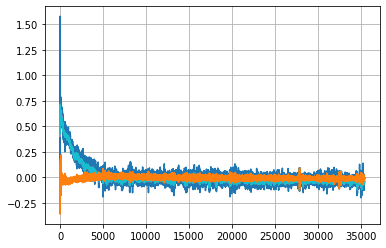

In [ ]:
x = sig
N = x.size

# DFT
X = np.fft.fft(x)
X_db = 20*np.log10(2*np.abs(X)/N)
#f = np.fft.fftfreq(N, 1/Fs)
#f = np.arange(0, N)*Fs/N

#plt.plot(f, X_db)
plt.plot(X)
plt.grid()
plt.show()

In [ ]:
s = sig[1, :] 

In [ ]:
emd = EMD()
imfs = emd(s)

In [ ]:
emd = EMD()
emd.FIXE = 11
imfs = emd(s)

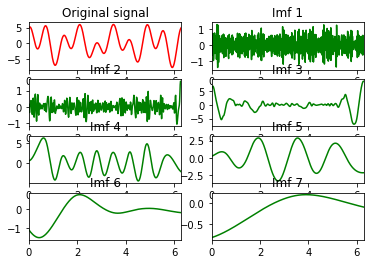

In [ ]:
from __future__ import print_function
 
import itertools
import logging
#import numpy as np
 
from multiprocessing import Pool
 
# Python3 handles mutliprocessing much better.
# For Python2 we need to pickle instance differently.
import sys
if sys.version_info[0] < 3:
    import copy_reg as copy_reg
    import types
    def _pickle_method(m):
        if m.im_self is None:
            return getattr, (m.im_class, m.im_func.func_name)
        else:
            return getattr, (m.im_self, m.im_func.func_name)
 
    copy_reg.pickle(types.MethodType, _pickle_method)
 
 
class EEMD:
    """
    **Ensemble Empirical Mode Decomposition**
 
    Ensemble empirical mode decomposition (EEMD) [Wu2009]_
    is noise-assisted technique, which is meant to be more robust
    than simple Empirical Mode Decomposition (EMD). The robustness is
    checked by performing many decompositions on signals slightly
    perturbed from their initial position. In the grand average over
    all IMF results the noise will cancel each other out and the result
    is pure decomposition.
 
    Parameters
    ----------
    trials : int (default: 100)
        Number of trials or EMD performance with added noise.
    noise_width : float (default: 0.05)
        Standard deviation of Gaussian noise (:math:`\hat\sigma`).
        It's relative to absolute amplitude of the signal, i.e.
        :math:`\hat\sigma = \sigma\cdot|\max(S)-\min(S)|`, where
        :math:`\sigma` is noise_width.
    ext_EMD : EMD (default: None)
        One can pass EMD object defined outside, which will be
        used to compute IMF decompositions in each trial. If none
        is passed then EMD with default options is used.
 
    References
    ----------
    .. [Wu2009] Z. Wu and N. E. Huang, "Ensemble empirical mode decomposition:
        A noise-assisted data analysis method", Advances in Adaptive
        Data Analysis, Vol. 1, No. 1 (2009) 1-41.
    """
 
    logger = logging.getLogger(__name__)
 
    noise_kinds_all = ["normal", "uniform"]
 
    def __init__(self, trials=100, noise_width=0.05, ext_EMD=None, parallel=True, **config):
 
        # Ensemble constants
        self.trials = trials
        self.noise_width = noise_width
 
        self.random = np.random.RandomState()
        self.noise_kind = "normal"
        self.parallel = parallel
 
        if ext_EMD is None:
            from PyEMD import EMD
            self.EMD = EMD()
        else:
            self.EMD = ext_EMD
 
        # Update based on options
        for key in config.keys():
            if key in self.__dict__.keys() or key == "processes":
                self.__dict__[key] = config[key]
            elif key in self.EMD.__dict__.keys():
                self.EMD.__dict__[key] = config[key]
 
    def __call__(self, S, T=None, max_imf=-1):
        return self.eemd(S, T=T, max_imf=max_imf)
 
    def __getstate__(self):
        self_dict = self.__dict__.copy()
        if 'pool' in self_dict:
            del self_dict['pool']
        return self_dict
 
    def generate_noise(self, scale, size):
        """
        Generate noise with specified parameters.
        Currently supported distributions are:
 
        * *normal* with std equal scale.
        * *uniform* with range [-scale/2, scale/2].
 
        Parameters
        ----------
        scale : float
            Width for the distribution.
        size : int
            Number of generated samples.
 
        Returns
        -------
        noise : numpy array
            Noise sampled from selected distribution.
        """
 
        if self.noise_kind=="normal":
            noise = self.random.normal(loc=0, scale=scale, size=size)
        elif self.noise_kind=="uniform":
            noise = self.random.uniform(low=-scale/2, high=scale/2, size=size)
        else:
            raise ValueError("Unsupported noise kind. Please assigned `noise_kind`"
                + " to be one of these: " + str(self.noise_kinds_all))
 
        return noise
 
    def noise_seed(self, seed):
        """Set seed for noise generation."""
        self.random.seed(seed)
 
    def eemd(self, S, T=None, max_imf=-1):
        """
        Performs EEMD on provided signal.
 
        For a large number of iterations defined by `trials` attr
        the method performs :py:meth:`emd` on a signal with added white noise.
 
        Parameters
        ----------
        S : numpy array,
            Input signal on which EEMD is performed.
        T : numpy array, (default: None)
            If none passed samples are numerated.
        max_imf : int, (default: -1)
            Defines up to how many IMFs each decomposition should
            be performed. By default (negative value) it decomposes
            all IMFs.
 
        Returns
        -------
        eIMF : numpy array
            Set of ensemble IMFs produced from input signal. In general,
            these do not have to be, and most likely will not be, same as IMFs
            produced using EMD.
        """
        if T is None: T = np.arange(len(S), dtype=S.dtype)
 
        scale = self.noise_width*np.abs(np.max(S)-np.min(S))
        self._S = S
        self._T = T
        self._N = N = len(S)
        self._scale = scale
        self.max_imf = max_imf
 
        # For trial number of iterations perform EMD on a signal
        # with added white noise
        if self.parallel:
            processes = None if "processes" not in self.__dict__ else self.__dict__["processes"]
            pool = Pool(processes=processes)
 
            all_IMFs = pool.imap(self._trial_update, range(self.trials))
 
            pool.close()
 
        else:  # Not parallel
            all_IMFs = map(self._trial_update, range(self.trials))
 
        all_IMFs_1, all_IMFs_2 = itertools.tee(all_IMFs, 2)
 
        max_imfNo = max([IMFs.shape[0] for IMFs in all_IMFs_1])
 
        self.E_IMF = np.zeros((max_imfNo, N))
        for IMFs in all_IMFs_2:
            self.E_IMF[:IMFs.shape[0]] += IMFs
 
        return self.E_IMF/self.trials
 
    def _trial_update(self, trial):
        # Generate noise
        noise = self.generate_noise(self._scale, self._N)
        return self.emd(self._S+noise, self._T, self.max_imf)
 
    def emd(self, S, T, max_imf=-1):
        """Vanilla EMD method.
 
        Provides emd evaluation from provided EMD class.
        For reference please see :class:`PyEMD.EMD`.
        """
        return self.EMD.emd(S, T, max_imf)
 
###################################################
## Beginning of program
 
if __name__ == "__main__":
 
    import pylab as plt
    global E_imfNo
    E_imfNo = np.zeros(50, dtype=np.int)
 
    # Logging options
    logging.basicConfig(level=logging.INFO)
 
    # EEMD options
    max_imf = -1
 
    # Signal options
    N = 500
    tMin, tMax = 0, 2*np.pi
    T = np.linspace(tMin, tMax, N)
 
    S = 3*np.sin(4*T) + 4*np.cos(9*T) + np.sin(8.11*T+1.2)
 
    # Prepare and run EEMD
    eemd = EEMD()
    eemd.trials = 50
    eemd.noise_seed(12345)
 
    E_IMFs = eemd.eemd(S, T, max_imf)
    imfNo  = E_IMFs.shape[0]
 
    # Plot results in a grid
    c = np.floor(np.sqrt(imfNo+1))
    r = np.ceil( (imfNo+1)/c)
 
    plt.ioff()
    plt.subplot(r,c,1)
    plt.plot(T, S, 'r')
    plt.xlim((tMin, tMax))
    plt.title("Original signal")
 
    for num in range(imfNo):
        plt.subplot(r,c,num+2)
        plt.plot(T, E_IMFs[num],'g')
        plt.xlim((tMin, tMax))
        plt.title("Imf "+str(num+1))
 
    plt.show()